In [1]:
import numpy as np
import math as m
import UCBogram as ucbg
import ContextBandit as cb
from matplotlib import pyplot as plt
from scipy.stats import special_ortho_group as ortho

In [28]:
def ucb(delta, bandit, X):
    n = len(X)
    k = bandit.k #number of arms
    upper_bounds = float('inf') * np.ones(k) #set upper bounds to infinity
    regrets = [] 
    means = np.zeros((k,2)) #to store means and T_i
    for i in range(n):
        arm = np.argmax(upper_bounds)
        reward = bandit.pull(arm, X[i])
        means[arm,0] = (means[arm,0] * means[arm,1] + reward)/(means[arm,1]+1)
        means[arm,1] += 1
        upper_bounds[arm] = means[arm,0] + np.sqrt(2*np.log(1/delta)/means[arm,1])
        regrets.append(bandit.regret)
    return regrets

## Case A
$ X_i \in [0,1]^2, 
\\ \mathbb{E}(Y^{a_1}|x) = \prod_{j=1}^2 \sin(4 \pi x_j),
\\ \mathbb{E}(Y^{a_2}|x) = \prod_{j=1}^2 \cos(7 \pi x_j).
$

In [30]:
lambdas = [lambda x: np.prod([m.sin(4 * xs * m.pi) for xs in x]),
            lambda x: np.prod([m.cos(7 * xs * m.pi) for xs in x])]
noise = lambda x: np.random.normal(0, 0.5)
X = np.random.uniform(0, 1, size=(10000, 2))
regretsA_ucb = []
for i in range(50):
    bandit = cb.ContextBandit(lambdas, noise)
    regretsA_ucb.append(ucb(0.1, bandit, X))

In [20]:
lambdas = [lambda x: np.prod([m.sin(4 * xs * m.pi) for xs in x]),
            lambda x: np.prod([m.cos(7 * xs * m.pi) for xs in x])]
noise = lambda x: np.random.normal(0, 0.5)
X = np.random.uniform(0, 1, size=(10000, 2))
regretsA_ucbg = []
for i in range(50):
    bandit = cb.ContextBandit(lambdas, noise)
    regretsA_ucbg.append(ucbg.ucbogram(bandit, X, 10))
np.savetxt("regretsA_ucbg.csv", np.asarray(regretsA_ucbg), delimiter = ",")

In [ ]:
regretsA_ucbg = np.loadtxt('regretsA_ucbg.csv', delimiter=',')
regretsA_knn = np.loadtxt('regretsA_knn.csv', delimiter=',')

Text(0.2, -0.1, 'Figure 1: Mean regret and standard deviation \n of 50 instances of KNN-UCB and UCBogram in setup A')

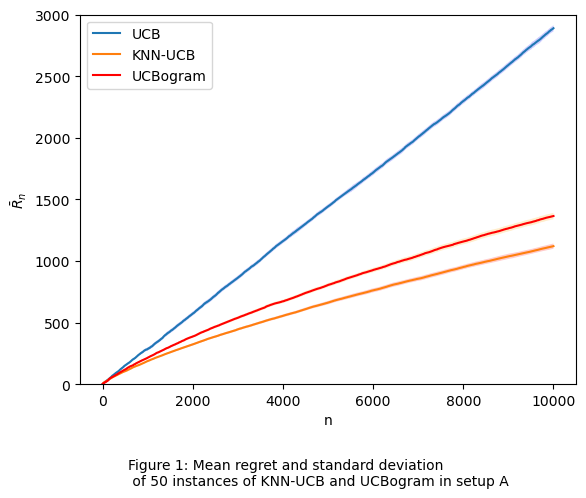

In [38]:
n = range(1,np.shape(regretsA_knn)[1] + 1, 1)
n_trials = np.shape(regretsA_knn)[0]
mean_regretsA_ucb = np.mean(regretsA_ucb, axis = 0)
mean_regretsA_ucbg = np.mean(regretsA_ucbg, axis = 0)
mean_regretsA_knn = np.mean(regretsA_knn, axis = 0)
stds_ucb = np.std(regretsA_ucb, axis = 0)
stds_ucbg = np.std(regretsA_ucbg, axis = 0)
stds_knn = np.std(regretsA_knn, axis = 0)
plt.xlabel('n')
plt.ylabel("$\\bar{R}_n$")
plt.ylim(0,3000)
upper_ci_ucb = mean_regretsA_ucb + (np.array(stds_ucb))
lower_ci_ucb = mean_regretsA_ucb - (np.array(stds_ucb))
upper_ci_ucbg = mean_regretsA_ucbg + (np.array(stds_ucbg))
lower_ci_ucbg = mean_regretsA_ucbg - (np.array(stds_ucbg))
upper_ci_knn = mean_regretsA_knn + (np.array(stds_knn))
lower_ci_knn = mean_regretsA_knn - (np.array(stds_knn))
plt.fill_between(n,lower_ci_ucb,upper_ci_ucb,facecolor='blue', alpha=0.2)
plt.fill_between(n,lower_ci_knn,upper_ci_knn,facecolor='red', alpha=0.2)
plt.fill_between(n,lower_ci_ucbg,upper_ci_ucbg,facecolor='orange', alpha=0.2)
plt.plot(n,mean_regretsA_ucb, label = "UCB")
plt.plot(n,mean_regretsA_knn, label = "KNN-UCB")
plt.plot(n, mean_regretsA_ucbg, c = "red", label = "UCBogram")
plt.legend()
plt.figtext(0.2,-0.1,"Figure 1: Mean regret and standard deviation \n of 50 instances of KNN-UCB and UCBogram in setup A")

## Case B
$ Z \in [0,1]^2, 
\\ X = Z . U[:2],\: for\,some\, orthogonal\, matrix\, U\, with\, dimension\, 3x3
\\ \mathbb{E}(Y^{a_1}|z) = \prod_{j=1}^2 \sin(3 \pi z_j),
\\ \mathbb{E}(Y^{a_2}|z) = \prod_{j=1}^2 \cos(5 \pi z_j)$

In [41]:
lambdas = [lambda x: np.prod([m.sin(3 * xs * m.pi) for xs in x]),
            lambda x: np.prod([m.cos(5 * xs * m.pi) for xs in x])]
noise = lambda x: np.random.normal(0, 0.5)
X = np.random.uniform(0, 1, size=(15000, 2))
regretsB_ucb = []
for i in range(50):
    bandit = cb.ContextBandit(lambdas, noise)
    regretsB_ucb.append(ucb(0.1, bandit, X))

In [16]:
d = 2
D = 3
U = ortho.rvs(D)
Z = np.random.uniform(0,1, size = (15000, d))
h = lambda z: np.dot(z, U[:d])
lambdas = [lambda y: np.prod([m.sin(3 * xs * m.pi) for xs in y]),
           lambda y: np.prod([m.cos(5 * xs * m.pi) for xs in y])]
noise = lambda y: np.random.normal(0, 0.5)
regretsB_ucbg = []
for i in range(50):
    bandit = cb.ContextBandit(lambdas, noise)
    regretsB_ucbg.append(ucbg.ucbogram(bandit, Z, 40, lo = -2, hi = 2, h= h))

In [24]:
regretsB_ucbg = np.loadtxt('regretsB_ucbg.csv', delimiter=',')
regretsB_knn = np.loadtxt('regretsB_knn.csv', delimiter=',')

Text(0.2, -0.1, 'Figure 1: Mean regrets and standard deviation \n of 10 instances of KNN-UCB and UCBogram in setup B')

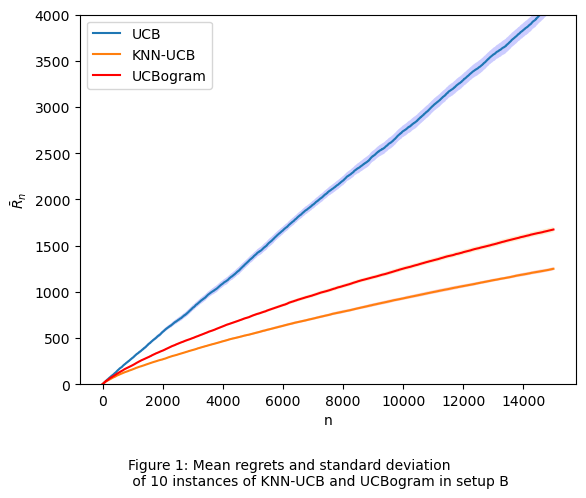

In [42]:
n = range(1, np.shape(regretsB_knn)[1]+1 , 1)
n_trials = np.shape(regretsB_knn)[0]
mean_regretsB_ucb = np.mean(regretsB_ucb, axis = 0)
mean_regretsB_ucbg = np.mean(regretsB_ucbg, axis = 0)
mean_regretsB_knn = np.mean(regretsB_knn, axis = 0)
stds_ucb = np.std(regretsB_ucb, axis = 0)
stds_ucbg = np.std(regretsB_ucbg, axis = 0)
stds_knn = np.std(regretsB_knn, axis = 0)
plt.xlabel('n')
plt.ylabel("$\\bar{R}_n$")
plt.ylim(0,4000)
upper_ci_ucb = mean_regretsB_ucb + (np.array(stds_ucb))
lower_ci_ucb = mean_regretsB_ucb - (np.array(stds_ucb))
upper_ci_ucbg = mean_regretsB_ucbg + (np.array(stds_ucbg))
lower_ci_ucbg = mean_regretsB_ucbg - (np.array(stds_ucbg))
upper_ci_knn = mean_regretsB_knn + (np.array(stds_knn))
lower_ci_knn = mean_regretsB_knn - (np.array(stds_knn))
plt.fill_between(n,lower_ci_ucb,upper_ci_ucb,facecolor='blue', alpha=0.2)
plt.fill_between(n,lower_ci_knn,upper_ci_knn,facecolor='red', alpha=0.2)
plt.fill_between(n,lower_ci_ucbg,upper_ci_ucbg,facecolor='orange', alpha=0.2)
plt.plot(n,mean_regretsB_ucb, label = "UCB")
plt.plot(n,mean_regretsB_knn, label = "KNN-UCB")
plt.plot(n, mean_regretsB_ucbg, c = "red", label = "UCBogram")
plt.legend()
plt.figtext(0.2,-0.1,"Figure 1: Mean regrets and standard deviation \n of 10 instances of KNN-UCB and UCBogram in setup B")

## Case C

$ Z \in [0,1]^2,
\\ X = (Z_1, Z_2, \prod_i Z_i, sin(\sum_i Z_i \pi))
\\ \mathbb{E}(Y^{a_1}|z) = 0,
\\ \mathbb{E}(Y^{a_2}|z) = \prod_{j=1}^2 \sin (4\pi z_j).
$

In [15]:
regrets_ucbg = np.loadtxt("data_C/ucbg_regrets.csv", delimiter = ",")

In [173]:
regrets_knn = np.loadtxt("data_C/knn_regrets.csv", delimiter = ",")

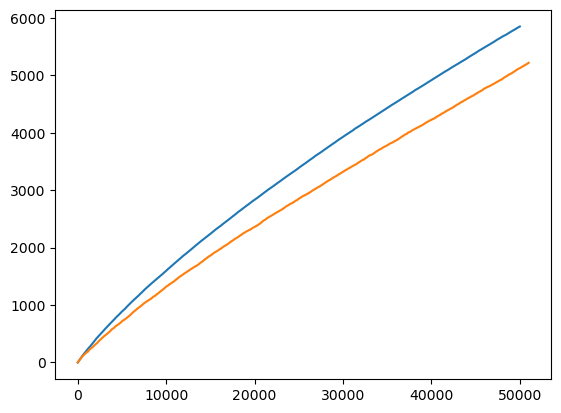

In [176]:
plt.plot(np.mean(regrets_ucbg[:, :50000], axis = 0), label = "UCBogram")
plt.plot(regrets_knn[2,:], label = "KNN-UCB")
plt.legend()

In [172]:
sum(np.subtract(regrets_knn[2,1:], regrets_knn[2,:-1])==0)

25679

In [175]:
np.shape(regrets_knn)

(3, 51000)

In [154]:
np.argpartition([3,4,5,9,2,88,1,0,99,44,23,7], 6)

array([ 6,  0,  2,  7,  4,  1, 11,  3,  8,  9, 10,  5], dtype=int64)